In [437]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report

In [363]:
df=pd.read_csv("CarsData.csv")

In [365]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [367]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [369]:
df.columns.tolist()

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize',
 'Manufacturer']

In [375]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}: {len(outliers)} outliers")

year: 0 outliers
price: 0 outliers
mileage: 0 outliers
tax: 0 outliers
mpg: 0 outliers
engineSize: 0 outliers


In [373]:
for col in df.select_dtypes(include="number"):
    Q1=df[col].quantile(0.25)   
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR  
    lower_bound=Q1-1.5*IQR
    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [377]:
x=df.drop("fuelType",axis=1)
y=df["fuelType"]

In [333]:
#df = pd.get_dummies(df, drop_first=True)
#df = pd.get_dummies(df, columns=['model','transmission', 'Manufacturer','fuelType'], drop_first=True)

In [379]:
x=pd.get_dummies(x,drop_first=True)

In [381]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [383]:
print(x_train.shape)
print(y_train.shape)

(78169, 212)
(78169,)


In [417]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [429]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [431]:
y_pred=model.predict(x_test)

In [443]:
print(accuracy_score(y_test,y_pred))

0.958194750038377


In [449]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

      Diesel       0.96      0.95      0.95      8064
    Electric       0.00      0.00      0.00         2
      Hybrid       0.94      0.91      0.93       589
       Other       0.62      0.08      0.14        61
      Petrol       0.96      0.97      0.97     10827

    accuracy                           0.96     19543
   macro avg       0.70      0.58      0.60     19543
weighted avg       0.96      0.96      0.96     19543



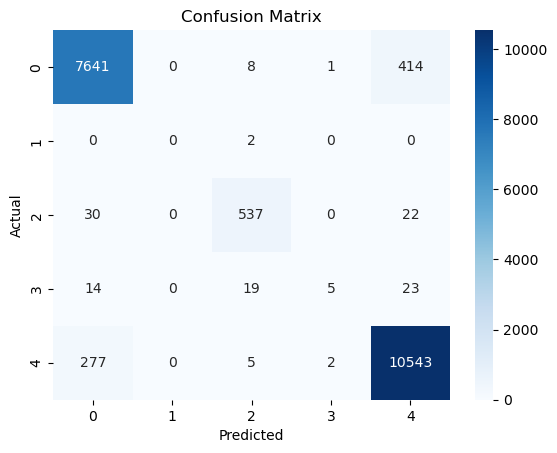

In [447]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()